# Linear and Polynomial Regression  

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluting your notebook!!! Do not change data files or their names



Student name: **Delfina Iriarte**

ID Number: **1231682**

## 1) Linear Regression on the Boston House Price dataset



## Dataset description

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price). <br>
The variable names are as follows:
1. CRIM: per capita crime rate by town. <br>
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. <br>
3. INDUS: proportion of nonretail business acres per town. <br>
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). <br>
5. NOX: nitric oxides concentration (parts per 10 million). <br>
6. RM: average number of rooms per dwelling. <br>
7. AGE: proportion of owner-occupied units built prior to 1940. <br>
8. DIS: weighted distances to five Boston employment centers. <br>
9. RAD: index of accessibility to radial highways. <br>
10. TAX: full-value property-tax rate per $\$$10,000. <br>
11. PTRATIO: pupil-teacher ratio by town. <br>
12. B: 1000*(Bk – 0.63)\$^2\$ where Bk is the proportion of blacks by town. <br>
13. LSTAT: \% lower status of the population. <br>
14. MEDV: Median value of owner-occupied homes in $\$$1000s. <br>

In [1]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd

#More on visualization
import seaborn as sns
%matplotlib inline

## Import Data
Load the data from a .csv file

**TO DO:** insert a seed number (e.g., your ID number (matricola))


In [2]:
# Load the data
IDnumber = 1231682 #(your ID, but try also to change and see what happens)
np.random.seed(IDnumber)

filename = "data/house.csv"

Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

# A quick overview of data

To inspect the data you can use the method describe()

In [3]:
dataDescription = stats.describe(Data)
print(dataDescription)

print ("Shape of data array: " + str(Data.shape))

#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

**Visualization of the data using Panda**

In [4]:
#This is how i load everything to one date using panda.
datos = pd.DataFrame(Data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

print('Table of data of the first rows:')  #Ploteo las primeras filas
datos.head()

#I can also convert to panda the file using:
    #datos = pd.read_csv("data/house.csv")
    #datos = pd.read_csv(filename)

Table of data of the first rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,240.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,216.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,347.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,334.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,362.0


In [5]:
print('Description of Data:')
datos.describe().T

Description of Data:


,count,mean,std,min,25%,50%,75%,max
CRIM,500.0,3.655786,8.644375,0.00632,0.082598,0.266005,3.69407,88.9762
ZN,500.0,11.500000,23.428739,0.00000,0.000000,0.000000,12.50000,100.0000
INDUS,500.0,11.131740,6.900712,0.46000,5.130000,9.125000,18.10000,27.7400
CHAS,500.0,0.070000,0.255403,0.00000,0.000000,0.000000,0.00000,1.0000
NOX,500.0,0.554451,0.116550,0.38500,0.448750,0.538000,0.62400,0.8710
RM,500.0,6.282970,0.705421,3.56100,5.883000,6.208500,6.62050,8.7800
AGE,500.0,68.424600,28.272145,2.90000,44.225000,77.150000,94.10000,100.0000
DIS,500.0,3.811932,2.112591,1.12960,2.087875,3.267450,5.21460,12.1265
RAD,500.0,9.642000,8.715604,1.00000,4.000000,5.000000,24.00000,24.0000
TAX,500.0,409.624000,168.998579,187.00000,281.000000,330.000000,666.00000,711.0000


**Visualization of data**

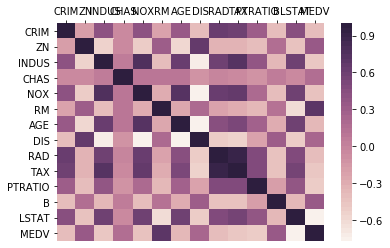

In [6]:
#This is a heat map that shows the correlation score between each set of values.
ax = sns.heatmap(datos.corr(),cmap=sns.cubehelix_palette(50, light=0.95,dark=0.15))
ax.xaxis.tick_top() # move labels to the top
plt.savefig('corr_matrix.png',bbox_inches='tight', dpi=300)

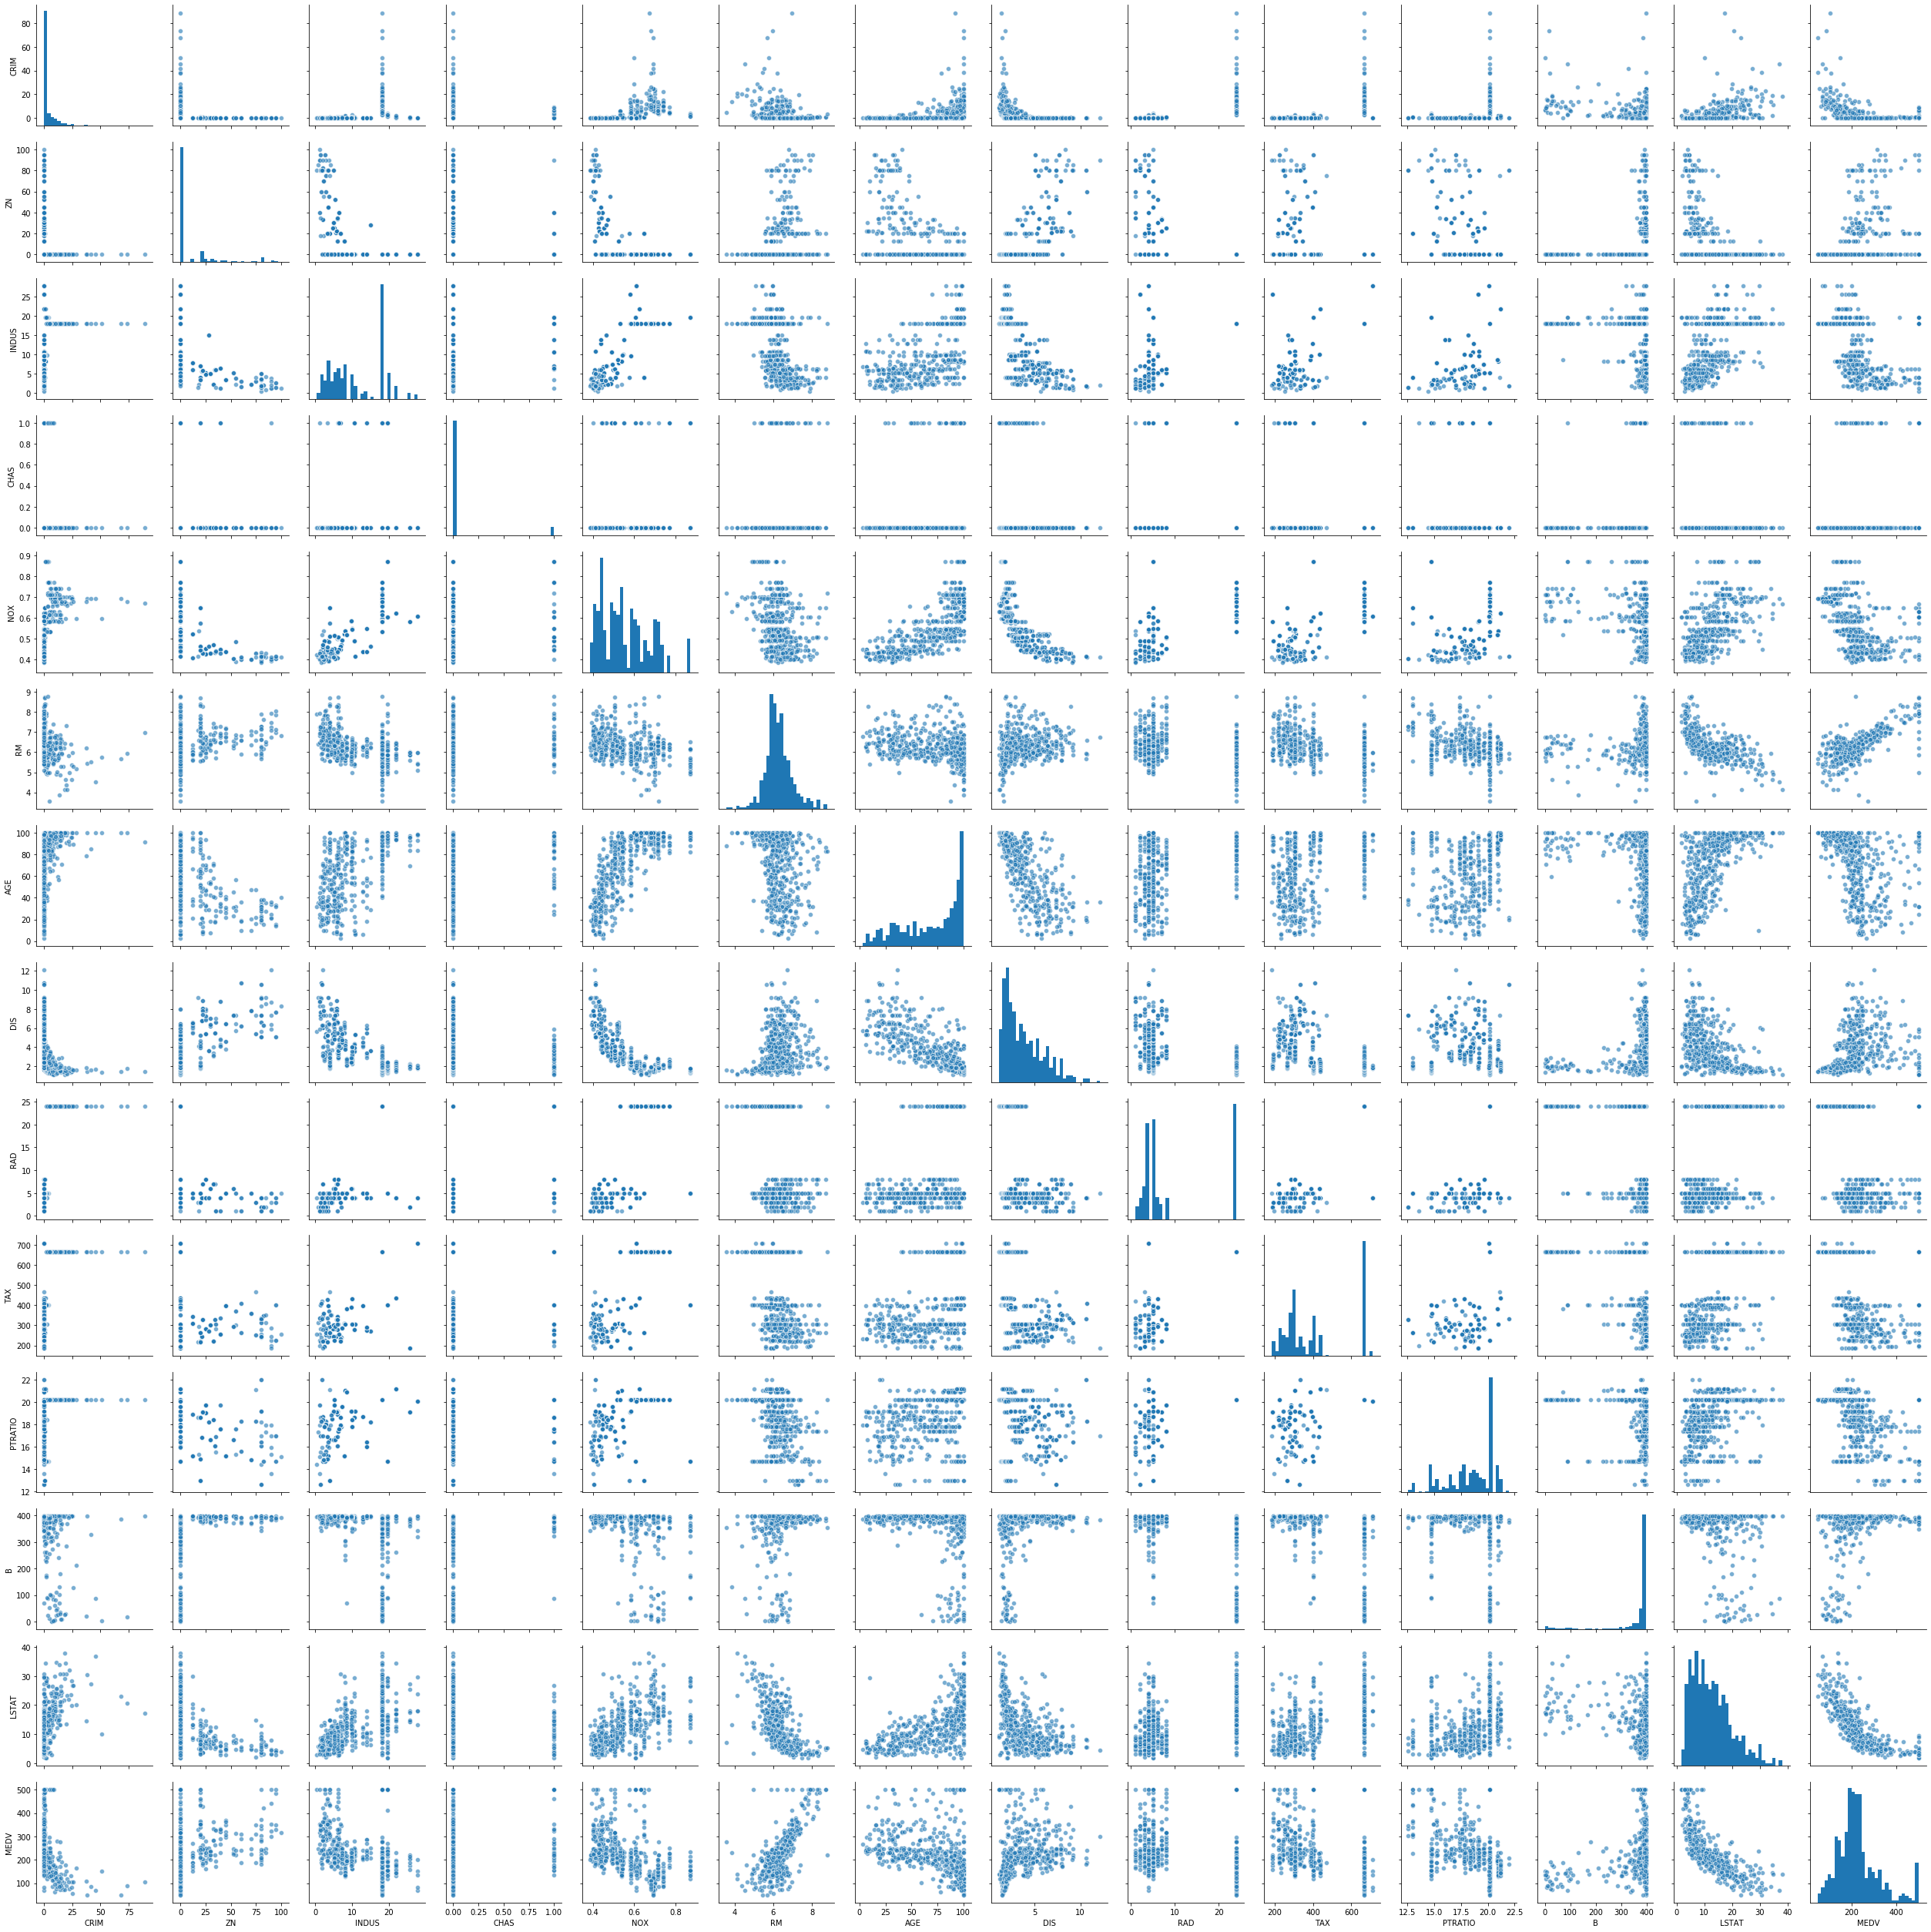

In [7]:
sns.pairplot(datos, plot_kws={'alpha': 0.6}, diag_kws={'bins': 30})

**Observations:**

 - RM and MEDV have the closest shape to normal distributions.
 - AGE is skewed to the left and LSTAT is skewed to the right 
 - For TAX, we find a large amount of the distribution is around 700. This is also evident from the scatter plots.
 - MEDV and LTSAT has an apparence of cubic (*)

# Split data in training, validation and test sets



Given $m$ total data, denote with $m_{tv}$ the part used for training and validation. Keep $m_t$ data as training data, $m_{val}:=m_{tv}-m_t$ as validation data and $m_{test}:=m - m_{val} - m_t = m-m_{tv}$. For instance one can take $m_t=m/2$ of the data as training, $m_{val}=m/4$  validation and $m_{test}=m/4$ as testing. Let us define: 

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{val}$ the validation data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

VALIDATION DATA: When different model classes are present (e.g. of different complexity such as linear regression which uses a different number $d_j$ of regressors $x_1$,...$x_{d_j}$), one has to choose which one is the "best" complexity. 
Let ${\cal H}_{d_j}$ be the space of models as a function of the complexity $d_j$ and let 
$$
\hat h_{d_j} = {\rm arg\; min}_{h \in {\cal H}_{d_j}} \, L_S(h)
$$

One can estimate the generalization error for model $\hat h_{d_j}$ as follows:
$$
L_{{\cal D}}(\hat h_{d_j}) \simeq \frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$
and then choose the complexity which achieves the best estimate of the generalization error
$$
\hat d_j: = {\rm arg\; min}_{d_j} \,\frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$

TESTING DATA: Last, the test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training, validation and test sets (50%-25%-25%)

In [8]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

#size of each chunk of data (1/4 each): 2 of them for training, 1 for validation, 1 for testing
size_chunk = int(num_total_samples/4.) 
print ("Size of each chunk of data: ", size_chunk)

#shuffle the data
np.random.shuffle(Data)


#training data 
X_training = Data[:2*size_chunk,:-1]  
Y_training = Data[:2*size_chunk,-1] 
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#validation data, to be used to choose among different models
X_validation =  Data[2*size_chunk:3*size_chunk,:-1]
Y_validation =  Data[2*size_chunk:3*size_chunk,-1] 
print ("Validation input data size: ", X_validation.shape)
print ("Validation output data size: ", Y_validation.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = Data[3*size_chunk:,:-1] 
Y_test = Data[3*size_chunk:,-1] 
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)


#In this case I'm spliting the Data the first part dedicated to the training, 
#the next part to the validation and the rest to the test set

#train_test_split()
#Aparently its very useful to use the train_test_split. it cna be use for spliting the data


Total number of samples:  500
Size of each chunk of data:  125
Training input data size:  (250, 13)
Training output data size:  (250,)
Validation input data size:  (125, 13)
Validation output data size:  (125,)
Test input data size:  (125, 13)
Test output data size:  (125,)



# Data Normalization

It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to $1$. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients. 

In [9]:
#scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))   # = [1111] mean is to small because the numbers are too small

X_validation = scaler.transform(X_validation) # use the same transformation on validation data
print ("Mean of the validation input data:", X_validation.mean(axis=0))
print ("Std of the validation input data:", X_validation.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))


Mean of the training input data: [ 3.97237798e-16  7.54951657e-18  3.96305211e-15  2.38475906e-16
  1.93223215e-15 -5.43654011e-15  7.50510765e-16  6.50146603e-16
 -6.75015599e-17 -1.87072580e-17  2.13686846e-14  2.82662782e-15
  1.50990331e-16]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the validation input data: [-0.03741001  0.27787339 -0.29973127  0.09805807 -0.15100966  0.03566457
 -0.14412577  0.24098339 -0.15145859 -0.22812247 -0.20490311 -0.00390367
 -0.06658889]
Std of the validation input data: [1.1124758  1.21619121 0.98173787 1.15747293 1.07349969 1.10584032
 1.00078946 1.0366548  0.94686273 0.96014272 1.03532463 1.05600758
 1.0229851 ]
Mean of the test input data: [-1.38211509e-02  1.60874065e-01 -1.87828477e-01 -4.61852778e-17
 -1.46125615e-01 -1.37859820e-01 -2.34083063e-01  1.46177115e-01
 -1.29885856e-01 -1.57656304e-01 -2.02304700e-01  1.84032324e-01
 -1.23258377e-01]
Std of the test input data: [1.45444032 1.13162382 1.01740663 1

# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients implementing the least square algorithm as done in the introductory lab **and** using np.linalg.lstsq from scikitlear 

**Linear regression** 

In [10]:
#compute linear regression coefficients for training data
#add a 1 at the beginning of each sample for training, validation, and testing (use homogeneous coordinates) 
m_training = X_training.shape[0]
X_training = np.hstack((np.ones((m_training,1)),X_training))
print(X_training[0,:])

m_validation = X_validation.shape[0]
X_validation = np.hstack((np.ones((m_validation,1)),X_validation))
print(X_validation[0,:])

m_test = X_test.shape[0]
X_test = np.hstack((np.ones((m_test,1)),X_test))
print(X_test[0,:])




[ 1.         -0.25690328 -0.42937251  1.11345386  3.82426464  0.37231851
  2.25226622  0.99996991 -0.75895498 -0.59190198 -0.13534202 -1.83187834
  0.39181475 -1.55166226]
[ 1.          1.97563072 -0.42937251  0.89704139 -0.26148818  0.9289303
 -3.24197305  1.0661366  -1.1955646   1.54290016  1.40904147  0.72013049
  0.46750028  3.47920647]
[ 1.         -0.48572139  1.67999024 -1.24661187 -0.26148818 -1.1119796
  0.38386498 -1.54009599  0.4614455  -0.59190198 -0.16470292 -1.59987753
  0.32152791 -1.18324358]


In [11]:
#This code it can be ignored.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_training, Y_training)

print ('slope coefficients:',reg.coef_)
print ('intercept:', reg.intercept_)
#predicting a little
Y_pred_train = reg.predict(X_test)
print(Y_pred_train[0:5])
print(Y_test)

#Look that the value of the prediction and the test are quiet similar. a gives 447 and the y test is 500!
#in general they are all pretty similar (of course with an error!)

slope coefficients: [  0.          -2.03829701   4.87766885  -0.14337444  10.49321578
 -10.1039778   26.29820251  -0.16778435 -17.82893397   9.49455216
 -12.34553169 -18.54791209   7.74372636 -39.3806372 ]
intercept: 220.56400000000053
[315.71965883 211.94195655 277.42405875 192.74164062 178.09809673]
[298. 243. 220. 180. 178. 324. 212. 228. 220. 203. 201. 234. 118. 329.
 275. 296. 198. 291. 146. 202. 189. 146. 226. 275.  74. 212. 187. 264.
 203. 237. 372.  72. 164. 240. 156. 500. 138. 196. 500. 362. 230. 203.
 315. 238. 230. 178. 205. 205. 228. 247.  83. 231. 301. 135. 215. 206.
 250. 387. 134. 280. 148. 226. 168. 483. 186. 219. 113. 221. 251. 199.
 165. 488. 193. 500. 219. 131. 174. 193. 334. 217. 115. 200. 197.  50.
 201. 303. 423. 224. 238. 247. 191. 162. 163. 161. 310. 217. 134. 142.
 347. 222. 281. 104. 208. 298. 373. 301. 231. 315. 166. 239. 152. 177.
 125. 262. 290. 239. 349. 211. 226. 193. 119. 311. 247. 237. 200.]


**Least-squares solution** 

In [12]:
print(X_training.shape)

n = len(X_training[:,1])

A = np.zeros((X_training.shape[1],X_training.shape[1]))
b = np.zeros((X_training.shape[1],1))
for i in range(0,n):
    e = X_training[i,:].reshape(X_training.shape[1],1) 
    A = A + np.matmul(e,np.transpose(e))
    b = b + Y_training[i]*e

w_1 = np.matmul(np.linalg.inv(A),b); # solve least squares

w_hand = w_1
w_handt = w_1.T
print(w_hand)


(250, 14)
[[ 2.20564000e+02]
 [-2.03829701e+00]
 [ 4.87766885e+00]
 [-1.43374436e-01]
 [ 1.04932158e+01]
 [-1.01039778e+01]
 [ 2.62982025e+01]
 [-1.67784350e-01]
 [-1.78289340e+01]
 [ 9.49455216e+00]
 [-1.23455317e+01]
 [-1.85479121e+01]
 [ 7.74372636e+00]
 [-3.93806372e+01]]


In [13]:
# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(X_training, Y_training, rcond=None) 
print("LS coefficients by hand:\n", w_handt)
print("LS coefficients with numpy lstsq:\n", w_np)
print('They are the same!')

LS coefficients by hand:
 [[ 2.20564000e+02 -2.03829701e+00  4.87766885e+00 -1.43374436e-01
   1.04932158e+01 -1.01039778e+01  2.62982025e+01 -1.67784350e-01
  -1.78289340e+01  9.49455216e+00 -1.23455317e+01 -1.85479121e+01
   7.74372636e+00 -3.93806372e+01]]
LS coefficients with numpy lstsq:
 [ 2.20564000e+02 -2.03829701e+00  4.87766885e+00 -1.43374436e-01
  1.04932158e+01 -1.01039778e+01  2.62982025e+01 -1.67784350e-01
 -1.78289340e+01  9.49455216e+00 -1.23455317e+01 -1.85479121e+01
  7.74372636e+00 -3.93806372e+01]
They are the same!


In [14]:
# compute Residual sums of squares by hand
dif = 0
RSStr_hand = 0
for i in range(n):
    dif = Y_training[i]-np.matmul(X_training[i], w_hand)
    RSStr_hand += sum(dif**2)
    
print("RSS by hand:",  RSStr_hand)
print("RSS with numpy lstsq: ", RSStr_np)

print("Empirical risk by hand:", RSStr_hand/m_training)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

RSS by hand: 520734.05392870295
RSS with numpy lstsq:  [520734.0539287]
Empirical risk by hand: 2082.9362157148116
Empirical risk with numpy lstsq: [2082.93621571]


## Data prediction 

Compute the output predictions on both training and validation set and compute the Residual Sum of Sqaures (RSS) defined above, the Emprical Loss and the quantity $1-R^2$ where
$$
R^2 = \frac{\sum_{z_i \in S_t} (\hat y_i - \bar y)^2}{\sum_{z_i \in S_t} (y_i - \bar y)^2} \quad \quad \bar y = \frac{1}{m_t} \sum_{z_i \in S_t} y_i
$$
is the so-called "Coefficient of determination" (COD)

**TO DO**: Compute these quantities on  training, validation and test sets.


In [15]:
#compute predictions on training and validation

#prediction_training 
prediction_training = np.matmul(X_training, w_hand) 
prediction_validation = np.matmul(X_validation, w_hand) 
prediction_test = np.matmul(X_test, w_hand) 


n1 = len(X_validation[:,1])
dif = 0
RSS_validation = 0
for i in range(n1):
    dif = Y_validation[i]-np.matmul(X_validation[i], w_hand)
    RSS_validation += sum(dif**2)

print("RSS on validation data:",  RSS_validation)

dif = 0
RSS_test = 0
for i in range(n1):
    dif = Y_test[i]-np.matmul(X_test[i], w_hand)
    RSS_test += sum(dif**2)


print("Loss estimated from validation data:", RSS_validation/m_validation)


#another measure of how good our linear fit is given by the following (that is 1 - R^2)
measure_training = 1 - (sum((prediction_training - np.mean(Y_training))**2)/sum((Y_training - np.mean(Y_training)) **2))
measure_validation = 1 - (sum((prediction_validation - np.mean(Y_validation))**2)/sum((Y_validation - np.mean(Y_validation)) **2))
measure_test = 1 - (sum((prediction_test - np.mean(Y_test))**2)/sum((Y_test - np.mean(Y_test)) **2))

print("Measure on Training Data (1-R^2):", measure_training)
print("Measure on Validation Data(1-R^2):", measure_validation)
print("Measure on Test Data(1-R^2):", measure_test)

RSS on validation data: 319747.6735777854
Loss estimated from validation data: 2557.981388622283
Measure on Training Data (1-R^2): [0.2574568]
Measure on Validation Data(1-R^2): [0.27791104]
Measure on Test Data(1-R^2): [0.26741883]


**QUESTION 1**: Comment on the results you get and on the difference between the train, validation and test errors.

The results appear to be reasonable. It can be seen that the RSS error of the training data is less than the validation data (same happens with the amount 1-R ^ 2). This leads us to think that the model is better at training data, which is what we expected -we fit the model with this values-, and smaller on the validation set since the model hasn't been train there.

On the other hand it can also be seen that the validation and test errors are similar.

## ... and plot:


### (1) output predictions on training  data

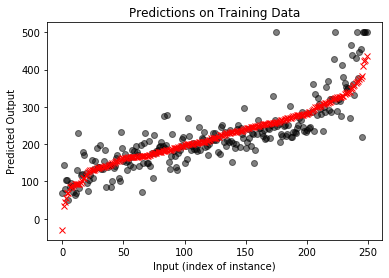

In [16]:
# Plot predictions on Training data 
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
# a line and it's easier to spot the differences

# NOTICE: This code is suitable for the "standard" solution, check that the variable names 
# and structure are compatible with your implementation

sorting_permutation = sorted(range(len(prediction_training[0:m_training])), key=lambda k: prediction_training[0:m_training][k])
plt.plot(Y_training[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_training[sorting_permutation], 'rx')

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Training Data')
plt.show()

### (2) output predictions on validation  data

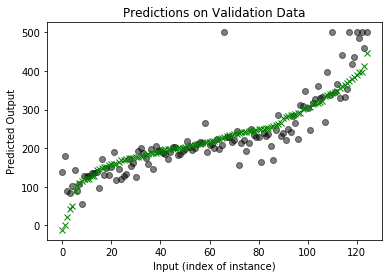

In [17]:
# Plot predictions on validation data 
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
# a line and it's easier to spot the differences

# NOTICE: This code is suitable for the "standard" solution, check that the variable names 
# and structure are compatible with your implementation

sorting_permutation = sorted(range(len(prediction_validation[0:m_validation])), key=lambda k: prediction_validation[0:m_validation][k])
plt.plot(Y_validation[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_validation[sorting_permutation], 'gx')


plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.show()

## Ordinary Least-Squares using scikit-learn

A fast way to compute the LS estimate is through sklearn.linear_model

In [18]:
from sklearn import linear_model
LinReg = linear_model.LinearRegression()  # build the object LinearRegression
LinReg.fit(X_training, Y_training)  # estimate the LS coefficients
print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)
prediction_training = LinReg.predict(X_training)  # predict output values on training set
prediction_test = LinReg.predict(X_test)  # predict output values on test set
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))


Intercept: 220.56400000000053
Least-Squares Coefficients: [  0.          -2.03829701   4.87766885  -0.14337444  10.49321578
 -10.1039778   26.29820251  -0.16778435 -17.82893397   9.49455216
 -12.34553169 -18.54791209   7.74372636 -39.3806372 ]
Measure on training data: 0.25745680272008586


# 2) Polynomial Regression

In this exercise you need to use polynomial regression to estimate the height reached by a ball thrown into air. The motion of the ball is controlled by the motion equation with uniform acceleration (in our case given by the gravity) that is a quadratic model. You need to estimate the initial height of the ball (h), the initial speed at which it was launched (v) and the gravity acceleration (g). The equation of the motion is : $y = h + vt + \frac{1}{2} gt^2$ .
In the motion.csv file you can find the measured height values (subject to noise) and the corresponding time instants.

In [19]:
#import the required packages
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [20]:
# load the data (time and height values) from the motion.csv file
with open('data/motion.csv', 'r') as f:
    motion = csv.reader(f, delimiter=';')
    
    header = next(motion) #skip first line
    print(header)
    
    # get all the rows as a list
    data = list(motion)
    # transform data into numpy array
    data = np.array(data).astype(float)

x = data[:,0]
y = data[:,1]
    
print(x.shape)
print(y.shape)

['time', 'height']
(500,)
(500,)


In [21]:
# try to perform a linear regression (it does not work properly, the model is quadratic !)

slope, intercept,  r_value, p_value, std_err = stats.linregress(x, y)

print('slope (linregress): ', slope,'  intercept (lnregress):', intercept);
print('correlation coefficient:', r_value)

slope (linregress):  0.5227301908080876   intercept (lnregress): 21.30455334702182
correlation coefficient: 0.08206857514729213


In [22]:
# use polynomial regression (the feature vectors have three components:

# y=ax2+bx+c  where a≠0 .

# they contain all 1s (for bias), the input data $x$ and their squared values $x^2$
dataX = np.zeros([500,3])  
dataX[:,0] = np.ones([500])  # dataX[:,0]: bias 
dataX[:,1] = x   # dataX[:,1]: 1st order terms
dataX[:,2] = x*x   # dataX[:,2]: 2nd order terms

from sklearn import linear_model
LinReg = linear_model.LinearRegression()  # build the object LinearRegression
LinReg.fit(dataX, y)  # estimate the LS coefficients
print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)
y_poly = LinReg.predict(dataX)


h = LinReg.coef_[0]
v = LinReg.coef_[1]
g = LinReg.coef_[2] *2 *-1
sc = LinReg.score(dataX, y) #COMPUTE # reg.score contains the square of the correlation coefficient
print('Square of the correlation coefficient', sc)

print('initial position: ', h,'  initial speed:', v, ' gravity acceleration:', g )
print('correlation coefficient:', np.sqrt(sc))

Intercept: 0.9690164318338041
Least-Squares Coefficients: [ 0.         25.02337708 -4.90994928]
Square of the correlation coefficient 0.997098305736246
initial position:  0.0   initial speed: 25.023377076576764  gravity acceleration: 9.81989855141029
correlation coefficient: 0.9985480988596623


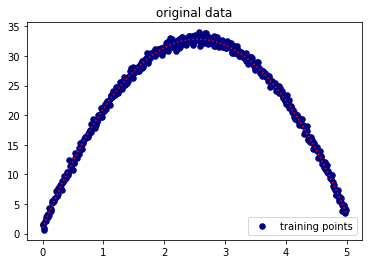

In [23]:
plt.show()

plt.figure()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower right')
plt.title('original data')

plt.plot(x, y_poly, 'r:', label="fit")

- Using Polynomial Features

0.4944546850267578
0.9971073586776993


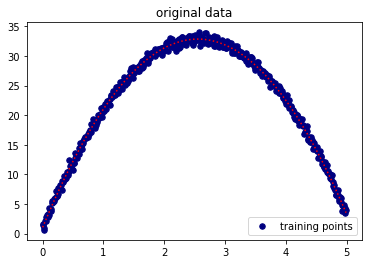

In [24]:
# plot the input data and the estimated models using polynomial features
#This can be ignored
# use polynomial regression (the feature vectors have three components:
# they contain all 1s (for bias), the input data $x$ and their squared values $x^2$

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

dataX = np.zeros([500,3])  
dataX[:,0] = np.ones([500])  # dataX[:,0]: bias 
dataX[:,1] = x   # dataX[:,1]: 1st order terms
dataX[:,2] = x*x   # dataX[:,2]: 2nd order terms

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(dataX)

reg =  LinearRegression()#
reg.fit(x_poly, y)
y_poly = reg.predict(x_poly)


rmse = np.sqrt(mean_squared_error(y,y_poly))
r2 = r2_score(y,y_poly)
print(rmse)
print(r2)


#Plotting
plt.show()
plt.figure()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower right')
plt.title('original data')

plt.plot(x_poly[:,2], y_poly, 'r:', label="fit")

#plt.plot(x_poly, y_poly, 'r:', label="fit")






**Question 2** Explain what do you conclude looking at the linear and polynomial fitting ?  

Of course, that in our example of the kid throwing the ball was necessary a fitting of a polynomial of second-order (if we have fit linear function things would not have worked well). However, I think that if we have applied a polynomial feat to the Boston house modeling we would have achieved a much better performance of the model. For example, if we see the variable MEDV and LTSAT in the plot figure (refer to *) we can see clearly a cubic behavior.
On the other hand, we can also see that the polynomial fir with a linear correlation coefficient 0.9985480988596623 that is really good !.